In [1]:
!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv


--2024-01-14 15:27:30--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.89K  --.-KB/s    in 0s      

2024-01-14 15:27:30 (2.04 GB/s) - ‘drug200.csv’ saved [6027/6027]



In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
#Reading the Dataset
df_drug = pd.read_csv("drug200.csv")
df_drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
#EDA
df_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df_drug.describe()


,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


Age skewness:  0.03030835703000607


<ipython-input-6-830a15da4e71>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_drug['Age']);


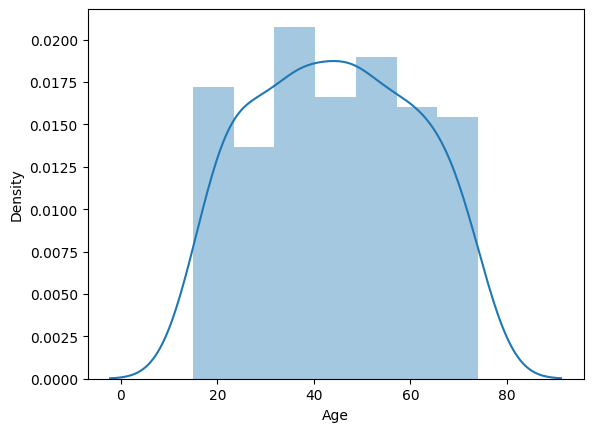

In [6]:
#analysing the skewness of numerical data:
skewAge = df_drug.Age.skew(axis = 0, skipna = True)
print('Age skewness: ', skewAge)
sns.distplot(df_drug['Age']);

Na to K skewness:  1.039341186028881


<ipython-input-7-7ece21ca7ae2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_drug['Na_to_K'])


<Axes: xlabel='Na_to_K', ylabel='Density'>

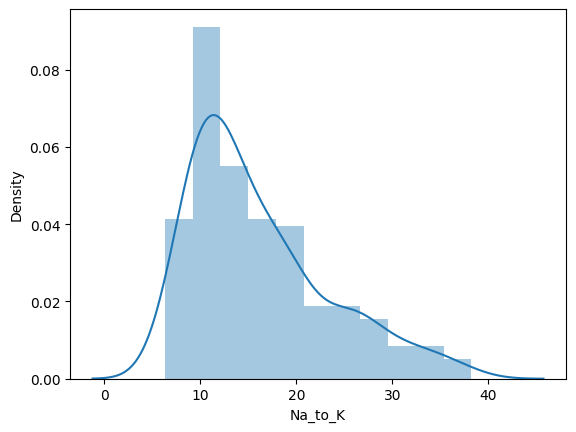

In [7]:
skewNatoK = df_drug.Na_to_K.skew(axis = 0, skipna = True)
print('Na to K skewness: ', skewNatoK)
sns.distplot(df_drug['Na_to_K'])

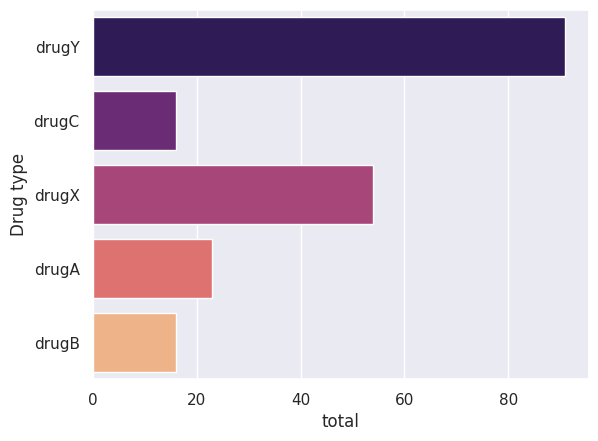

In [8]:
# Drug Type Distribution
sns.set_theme(style="darkgrid")
sns.countplot(y="Drug", data=df_drug, palette = "magma")
plt.ylabel("Drug type")
plt.xlabel("total")
plt.show()

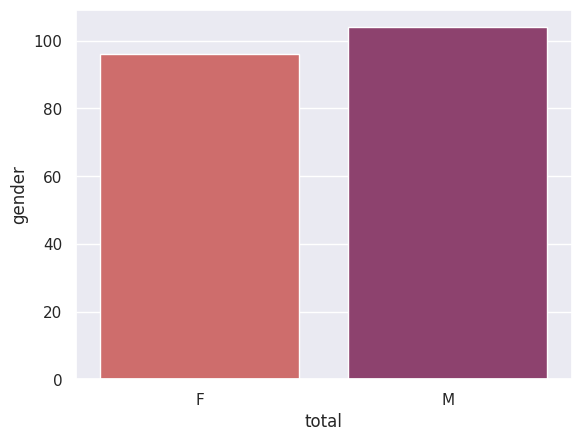

In [9]:
#Gender Distribution
sns.set_theme(style='darkgrid')
sns.countplot(x="Sex", data=df_drug, palette= "flare")
plt.ylabel("gender")
plt.xlabel("total")
plt.show()

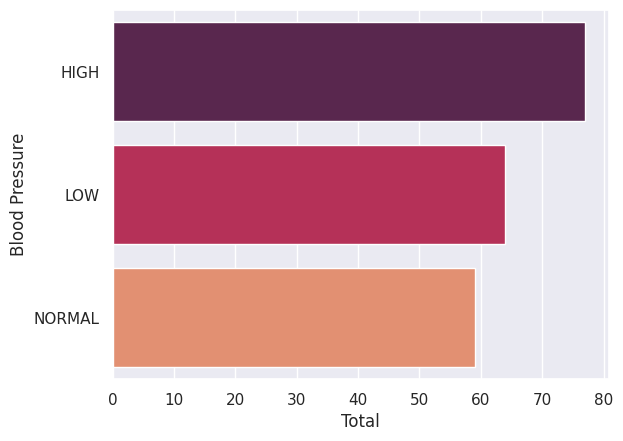

In [10]:
# Blood Pressure Distribution
sns.set_theme(style="darkgrid")
sns.countplot(y = "BP", data=df_drug, palette="rocket")
plt.ylabel("Blood Pressure")
plt.xlabel("Total")
plt.show()

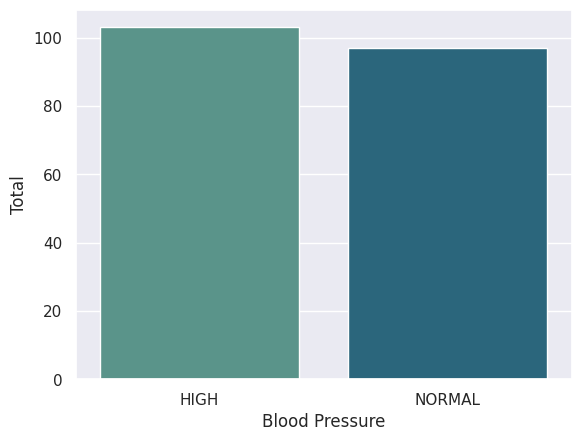

In [11]:
# Cholesterol Distribution
sns.set_theme(style="darkgrid")
sns.countplot(x="Cholesterol", data=df_drug, palette="crest")
plt.xlabel('Blood Pressure')
plt.ylabel('Total')
plt.show()

In [12]:

#Age is divided into 7 bins:0 to 19,20-29,20-29,40-49,50-59,60-69,more than or equal to 70

bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
df_drug['Age_binned'] = pd.cut(df_drug['Age'], bins=bin_age, labels=category_age)
df_drug = df_drug.drop(['Age'], axis = 1)

In [13]:
#Na_to_K ratio is divided into 4 categories: 0 to 9,10 to 19,20 to 29,above or equal to 30

bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
df_drug['Na_to_K_binned'] = pd.cut(df_drug['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
df_drug = df_drug.drop(['Na_to_K'], axis = 1)

In [14]:
#Splitting the dataset

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
X = df_drug.drop(["Drug"], axis=1)
y = df_drug["Drug"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [15]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train.head()


,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
131,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
96,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
181,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0
19,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
153,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [16]:
df_drug.Drug.value_counts()


drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

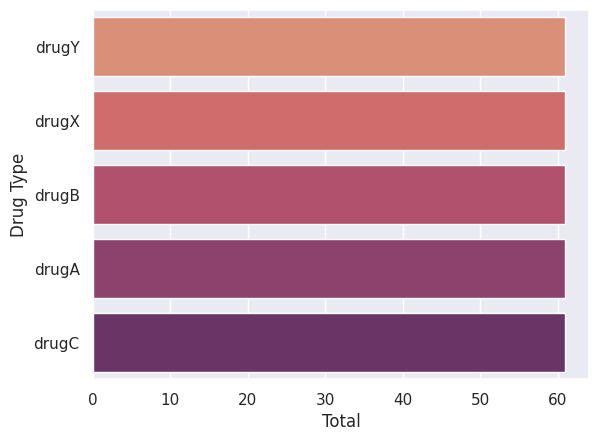

In [17]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=df_drug, palette="flare")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()


In [18]:
#Classification Models
# Logistic Regression
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))


              precision    recall  f1-score   support

       drugA       0.71      1.00      0.83         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.79      0.83      0.81        18
       drugY       0.88      0.70      0.78        30

    accuracy                           0.80        60
   macro avg       0.76      0.91      0.82        60
weighted avg       0.82      0.80      0.80        60

[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 15  3]
 [ 2  1  2  4 21]]
Logistic Regression accuracy is: 80.00%


In [19]:
# K-Neighbours
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=20)
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))

              precision    recall  f1-score   support

       drugA       0.42      1.00      0.59         5
       drugB       1.00      0.33      0.50         3
       drugC       0.50      1.00      0.67         4
       drugX       0.81      0.94      0.87        18
       drugY       0.94      0.57      0.71        30

    accuracy                           0.73        60
   macro avg       0.73      0.77      0.67        60
weighted avg       0.83      0.73      0.73        60

[[ 5  0  0  0  0]
 [ 1  1  0  0  1]
 [ 0  0  4  0  0]
 [ 1  0  0 17  0]
 [ 5  0  4  4 17]]
K Neighbours accuracy is: 73.33%


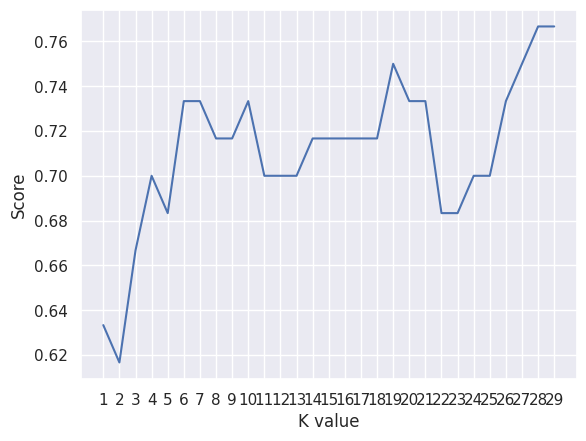

KNN Acc Max 76.67%


In [20]:
scoreListknn = []
for i in range(1,30):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))

plt.plot(range(1,30), scoreListknn)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAccMax = max(scoreListknn)
print("KNN Acc Max {:.2f}%".format(KNAccMax*100))

In [21]:
#Support Vector Machine SVM
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='linear', max_iter=251)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))


              precision    recall  f1-score   support

       drugA       0.71      1.00      0.83         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18
       drugY       1.00      0.70      0.82        30

    accuracy                           0.85        60
   macro avg       0.79      0.94      0.84        60
weighted avg       0.89      0.85      0.85        60

[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 2  1  2  4 21]]
SVC accuracy is: 85.00%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=251).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [22]:
#Categorical Naive Bayes
from sklearn.naive_bayes import CategoricalNB
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Naive Bayes accuracy is: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

       drugA       0.62      1.00      0.77         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18
       drugY       1.00      0.67      0.80        30

    accuracy                           0.83        60
   macro avg       0.77      0.93      0.83        60
weighted avg       0.88      0.83      0.83        60

[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 3  1  2  4 20]]
Naive Bayes accuracy is: 83.33%


In [23]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy is: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

       drugA       0.60      0.60      0.60         5
       drugB       0.75      1.00      0.86         3
       drugC       1.00      0.50      0.67         4
       drugX       1.00      0.39      0.56        18
       drugY       0.64      0.90      0.75        30

    accuracy                           0.70        60
   macro avg       0.80      0.68      0.69        60
weighted avg       0.78      0.70      0.68        60

[[ 3  0  0  0  2]
 [ 0  3  0  0  0]
 [ 0  0  2  0  2]
 [ 0  0  0  7 11]
 [ 2  1  0  0 27]]
Gaussian Naive Bayes accuracy is: 70.00%


In [24]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=20)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

       drugA       0.43      0.60      0.50         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18
       drugY       0.90      0.63      0.75        30

    accuracy                           0.78        60
   macro avg       0.71      0.85      0.76        60
weighted avg       0.82      0.78      0.78        60

[[ 3  0  0  0  2]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 4  1  2  4 19]]
Decision Tree accuracy is: 78.33%


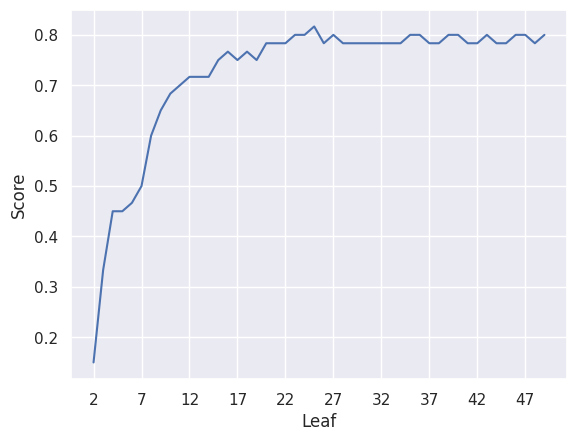

DT Acc Max 81.67%


In [25]:
scoreListDT = []
for i in range(2,50):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))

plt.plot(range(2,50), scoreListDT)
plt.xticks(np.arange(2,50,5))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAccMax = max(scoreListDT)
print("DT Acc Max {:.2f}%".format(DTAccMax*100))


In [26]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

       drugA       0.62      1.00      0.77         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.78      1.00      0.88        18
       drugY       1.00      0.63      0.78        30

    accuracy                           0.82        60
   macro avg       0.76      0.93      0.82        60
weighted avg       0.87      0.82      0.81        60

[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 3  1  2  5 19]]
Random Forest accuracy is: 81.67%


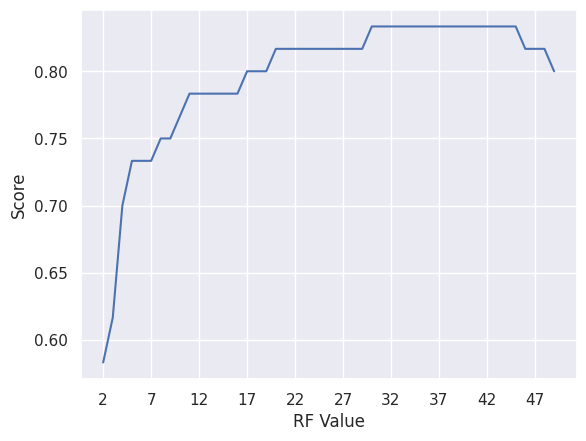

RF Acc Max 83.33%


In [27]:
scoreListRF = []
for i in range(2,50):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))

plt.plot(range(2,50), scoreListRF)
plt.xticks(np.arange(2,50,5))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAccMax = max(scoreListRF)
print("RF Acc Max {:.2f}%".format(RFAccMax*100))

In [28]:
#Model Comparison
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'K Neighbors Max', 'SVM', 'Categorical NB', 'Gaussian NB', 'Decision Tree', 'Decision Tree Max', 'Random Forest', 'Random Forest Max'],
                        'Accuracy': [LRAcc*100, KNAcc*100, KNAccMax*100, SVCAcc*100, NBAcc1*100, NBAcc2*100, DTAcc*100, DTAccMax*100, RFAcc*100, RFAccMax*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
3,SVM,85.000000
4,Categorical NB,83.333333
9,Random Forest Max,83.333333
7,Decision Tree Max,81.666667
8,Random Forest,81.666667
0,Logistic Regression,80.000000
6,Decision Tree,78.333333
2,K Neighbors Max,76.666667
1,K Neighbors,73.333333
5,Gaussian NB,70.000000


In [29]:
#Transforming prediction in csv file format
pred_lr = NBclassifier1.predict(X_test)
prediction = pd.DataFrame({'Sex_F': X_test.loc[:,"Sex_F"],
                           'Sex_M': X_test.loc[:,"Sex_M"],
                           'BP_HIGH': X_test.loc[:,"BP_HIGH"],
                           'BP_LOW': X_test.loc[:,"BP_LOW"],
                           'BP_NORMAL': X_test.loc[:,"BP_NORMAL"],
                           'Cholesterol_HIGH': X_test.loc[:,"Cholesterol_HIGH"],
                           'Cholesterol_NORMAL': X_test.loc[:,"Cholesterol_NORMAL"],
                           'Age_binned_<20s': X_test.loc[:,"Age_binned_<20s"],
                           'Age_binned_20s': X_test.loc[:,"Age_binned_20s"],
                           'Age_binned_30s': X_test.loc[:,"Age_binned_30s"],
                           'Age_binned_40s': X_test.loc[:,"Age_binned_40s"],
                           'Age_binned_50s': X_test.loc[:,"Age_binned_50s"],
                           'Age_binned_60s': X_test.loc[:,"Age_binned_60s"],
                           'Age_binned_>60s': X_test.loc[:,"Age_binned_>60s"],
                           'Na_to_K_binned_<10': X_test.loc[:,"Na_to_K_binned_<10"],
                           'Na_to_K_binned_10-20': X_test.loc[:,"Na_to_K_binned_10-20"],
                           'Na_to_K_binned_20-30': X_test.loc[:,"Na_to_K_binned_20-30"],
                           'Na_to_K_binned_>30': X_test.loc[:,"Na_to_K_binned_>30"],'DrugType': pred_lr})
# Sex
prediction['Sex_F'] = prediction['Sex_F'].replace([1, 0],['Female', 'Male'])

#BP
prediction['BP_HIGH'] = prediction['BP_HIGH'].replace([1, 0],['High',''])
prediction['BP_LOW'] = prediction['BP_LOW'].replace([1, 0],['Low', ''])
prediction['BP_NORMAL'] = prediction['BP_NORMAL'].replace([1, 0],['Normal', ''])

prediction['BP_HIGH'] = np.where((prediction['BP_HIGH'] == ''), prediction['BP_LOW'], prediction['BP_HIGH'])
prediction['BP_HIGH'] = np.where((prediction['BP_HIGH'] == ''), prediction['BP_NORMAL'], prediction['BP_HIGH'])

#Cholestrol
prediction['Cholesterol_HIGH'] = prediction['Cholesterol_HIGH'].replace([1, 0],['High', 'Normal'])

#Age_binned
prediction['Age_binned_<20s'] = prediction['Age_binned_<20s'].replace([1, 0],['<20s',''])
prediction['Age_binned_20s'] = prediction['Age_binned_20s'].replace([1, 0],['20s',''])
prediction['Age_binned_30s'] = prediction['Age_binned_30s'].replace([1, 0],['30s',''])
prediction['Age_binned_40s'] = prediction['Age_binned_40s'].replace([1, 0],['40s',''])
prediction['Age_binned_50s'] = prediction['Age_binned_50s'].replace([1, 0],['50s',''])
prediction['Age_binned_60s'] = prediction['Age_binned_60s'].replace([1, 0],['60s',''])
prediction['Age_binned_>60s'] = prediction['Age_binned_>60s'].replace([1, 0],['>60s',''])

prediction['Age_binned_<20s'] = np.where((prediction['Age_binned_<20s'] == ''), prediction['Age_binned_20s'], prediction['Age_binned_<20s'])
prediction['Age_binned_<20s'] = np.where((prediction['Age_binned_<20s'] == ''), prediction['Age_binned_30s'], prediction['Age_binned_<20s'])
prediction['Age_binned_<20s'] = np.where((prediction['Age_binned_<20s'] == ''), prediction['Age_binned_40s'], prediction['Age_binned_<20s'])
prediction['Age_binned_<20s'] = np.where((prediction['Age_binned_<20s'] == ''), prediction['Age_binned_50s'], prediction['Age_binned_<20s'])
prediction['Age_binned_<20s'] = np.where((prediction['Age_binned_<20s'] == ''), prediction['Age_binned_60s'], prediction['Age_binned_<20s'])
prediction['Age_binned_<20s'] = np.where((prediction['Age_binned_<20s'] == ''), prediction['Age_binned_>60s'], prediction['Age_binned_<20s'])


#Na to K
prediction['Na_to_K_binned_<10'] = prediction['Na_to_K_binned_<10'].replace([1, 0],['<10',''])
prediction['Na_to_K_binned_10-20'] = prediction['Na_to_K_binned_10-20'].replace([1, 0],['10-20',''])
prediction['Na_to_K_binned_20-30'] = prediction['Na_to_K_binned_20-30'].replace([1, 0],['20-30',''])
prediction['Na_to_K_binned_>30'] = prediction['Na_to_K_binned_>30'].replace([1, 0],['>30s',''])

prediction['Na_to_K_binned_<10'] = np.where((prediction['Na_to_K_binned_<10'] == ''), prediction['Na_to_K_binned_10-20'], prediction['Na_to_K_binned_<10'])
prediction['Na_to_K_binned_<10'] = np.where((prediction['Na_to_K_binned_<10'] == ''), prediction['Na_to_K_binned_20-30'], prediction['Na_to_K_binned_<10'])
prediction['Na_to_K_binned_<10'] = np.where((prediction['Na_to_K_binned_<10'] == ''), prediction['Na_to_K_binned_>30'], prediction['Na_to_K_binned_<10'])

# Drop columns
prediction = prediction.drop(['Sex_M', 'BP_LOW', 'BP_NORMAL', 'Cholesterol_NORMAL', 'Age_binned_20s', 'Age_binned_30s',
                 'Age_binned_40s', 'Age_binned_50s', 'Age_binned_60s', 'Age_binned_>60s',
                'Na_to_K_binned_10-20', 'Na_to_K_binned_20-30', 'Na_to_K_binned_>30'], axis = 1)
# Rename columns name
new_name = {'Sex_F': 'Sex', 'BP_HIGH': 'BP', 'Cholesterol_HIGH': 'Cholesterol', 'Age_binned_<20s': 'Age_binned',
          'Na_to_K_binned_<10': 'Na_to_K_binned'}
prediction.rename(columns=new_name, inplace=True)

#Generating output file

prediction.to_csv('prediction.csv', index=False)
predictioncsv = pd.read_csv('./prediction.csv')
predictioncsv.head()

,Sex,BP,Cholesterol,Age_binned,Na_to_K_binned,DrugType
0,Male,Low,High,20s,<10,drugC
1,Female,Normal,High,20s,10-20,drugX
2,Male,Low,High,40s,20-30,drugY
3,Male,High,Normal,20s,>30s,drugY
4,Male,Normal,High,20s,20-30,drugY
